<a href="https://colab.research.google.com/github/noahnguyen2004/Comparing-Statistical-Properties-Of-Estimators/blob/main/Statistical_Properties_Of_Estimators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from scipy.stats import norm

## Independent normal random variables analysis

In [ ]:
# set up fixed mean and std dev
mean = 5
var = 1
X_norm = [mean, var]
Y_norm = [mean*2, var]
print(Y_norm)
print(X_norm)

[10, 1]
[5, 1]


In [ ]:
# set up linear combination random variables
def lin_comb_norm(x_const, y_const, mean_x, mean_y, var_x, var_y):
  '''
    Set up any random variable as a linear combinations
    of 2 independent random variables
  '''
  mean = x_const * mean_x + y_const * mean_y
  var = pow(x_const, 2) * var_x + pow(y_const, 2) * var_y     # covariance between X and Y is 0 as they are independent random variables
  var = round(var, 2)
  lin_comb_norm_variable = [mean, var]
  return lin_comb_norm_variable

In [ ]:
# set up distributions for theta_est and theta_alt
theta_est_norm = lin_comb_norm(1/5, 2/5, X_norm[0], Y_norm[0], X_norm[1], Y_norm[1])
print(theta_est_norm)

theta_alt_norm = lin_comb_norm(11/13, 1/13, X_norm[0], Y_norm[0], X_norm[1], Y_norm[1])
print(theta_alt_norm)

[5.0, 0.2]
[5.0, 0.72]


In [ ]:
# X's, Y's distribution set up
X_dist = np.random.normal(X_norm[0], X_norm[1], size=1000)
X_mean = np.mean(X_dist)
X_std = np.std(X_dist)

Y_dist = np.random.normal(Y_norm[0], Y_norm[1], size=1000)
Y_mean = np.mean(Y_dist)
Y_std = np.std(Y_dist)

# theta estimator distribution set up
theta_est_norm_dist = np.random.normal(theta_est_norm[0], theta_est_norm[1], size=1000)
theta_est_mean = np.mean(theta_est_norm_dist)
theta_est_std = np.std(theta_est_norm_dist)

# theta alt distribution set up
theta_alt_norm_dist = np.random.normal(theta_alt_norm[0], theta_alt_norm[1], size=1000)
theta_alt_mean = np.mean(theta_alt_norm_dist)
theta_alt_std = np.std(theta_alt_norm_dist)

### What do their respective distributions look like?

<ipython-input-55-4e654c938dc5>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_dist, hist=False, kde=True, color='skyblue', kde_kws={"shade": True})
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
<ipython-input-55-4e654c938dc5>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function w

Text(0.5, 1.0, 'theta_alt normal distribution')

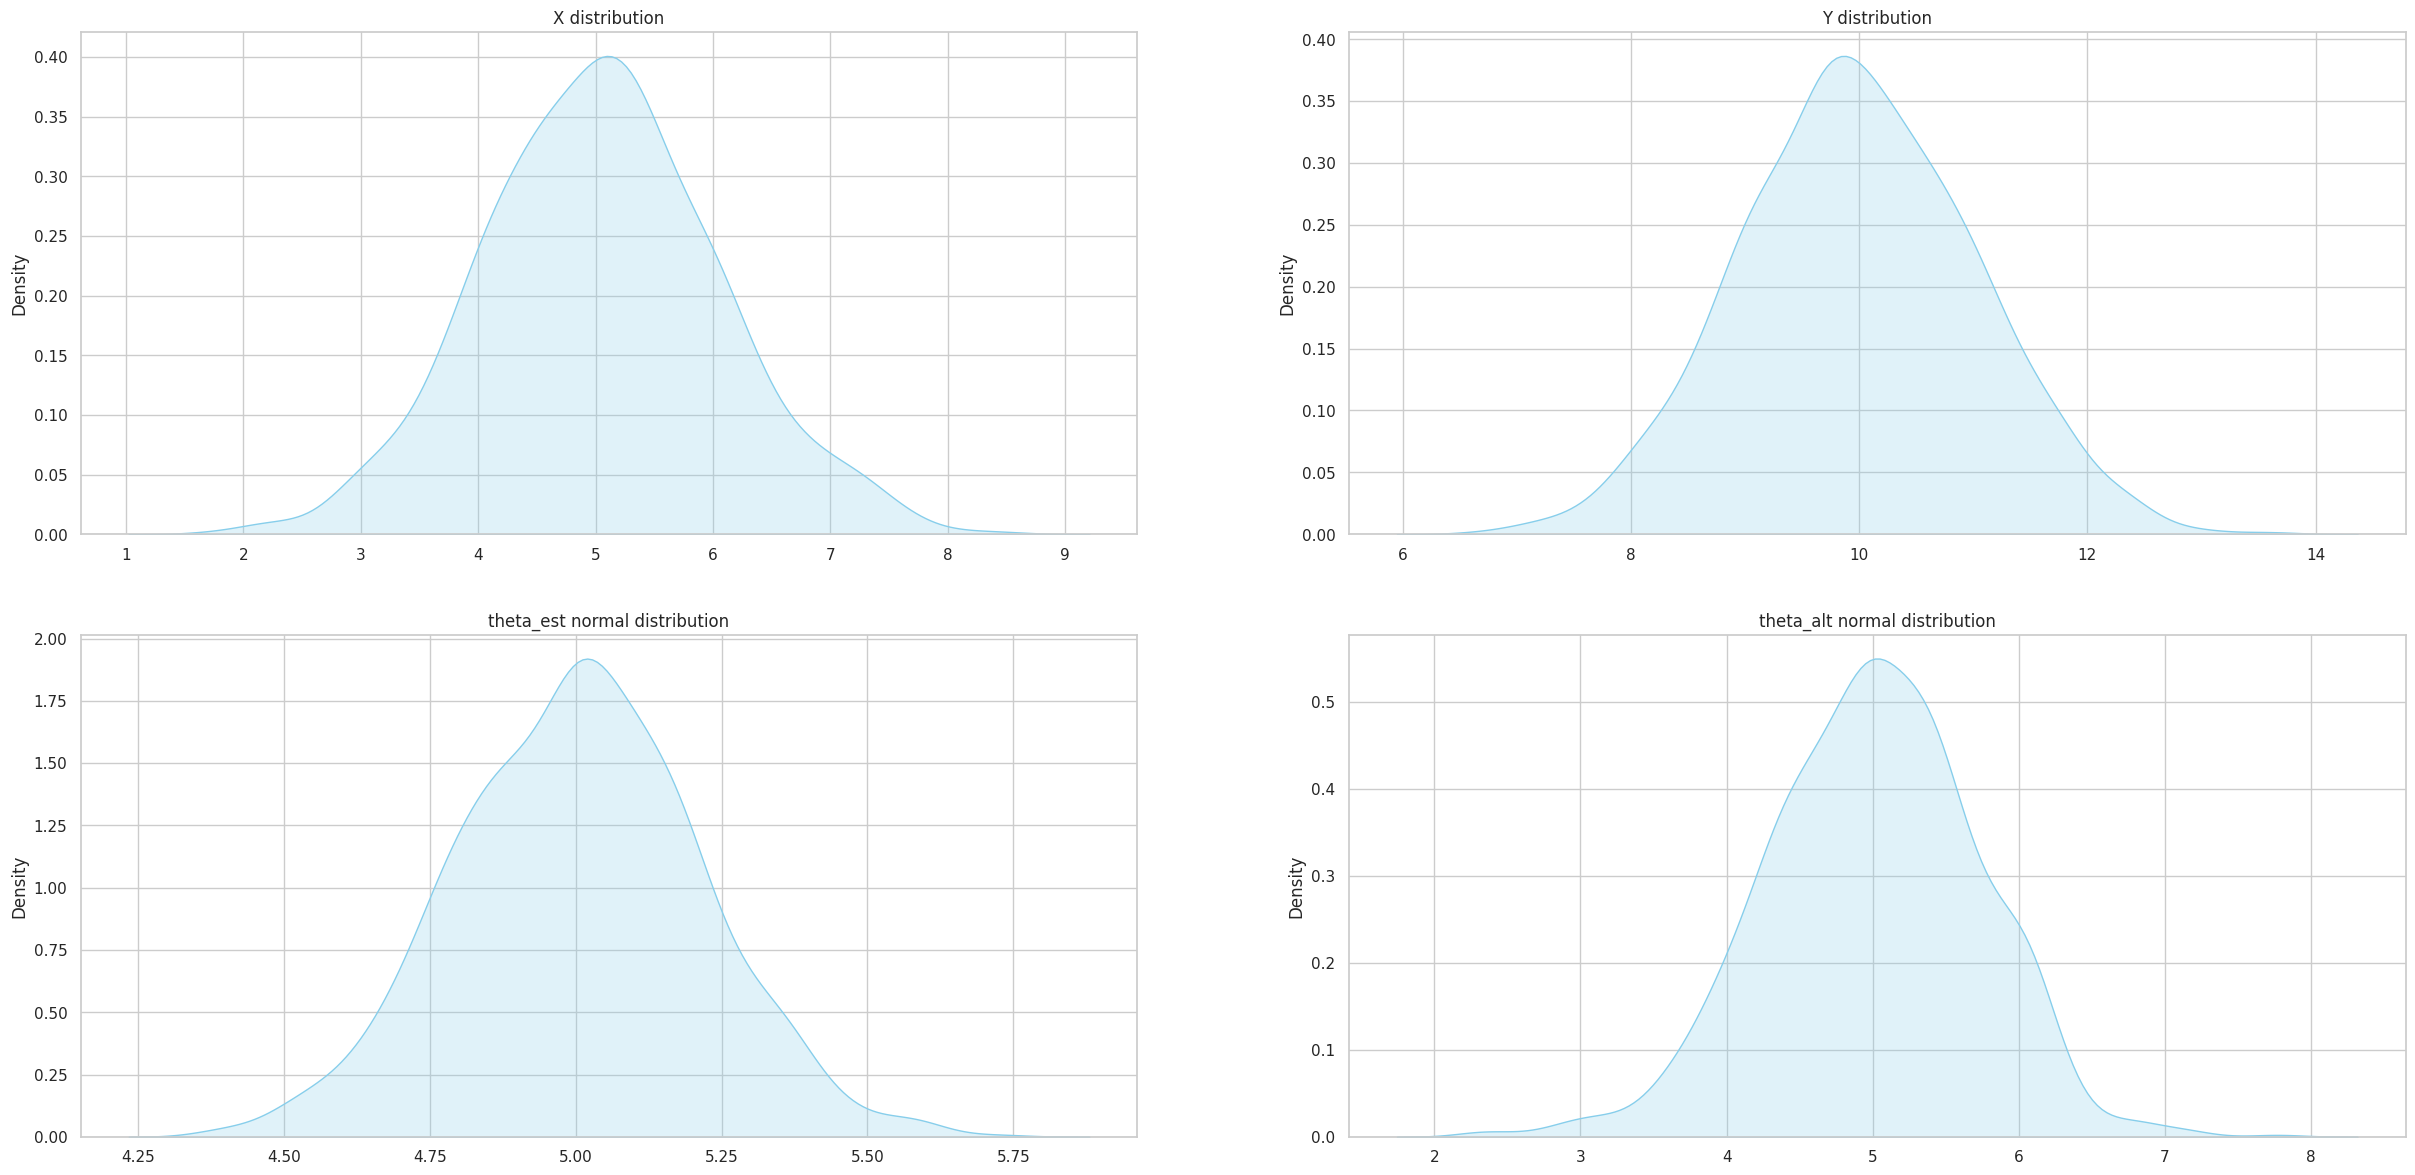

In [ ]:
# plotting distributions
plt.figure(figsize=(30, 30))  # Adjust the figure size as needed

plt.subplot(4, 2, 1)
sns.set(style="whitegrid")
sns.distplot(X_dist, hist=False, kde=True, color='skyblue', kde_kws={"shade": True})
plt.title("X distribution")

plt.subplot(4, 2, 2)
sns.set(style="whitegrid")
sns.distplot(Y_dist, hist=False, kde=True, color='skyblue', kde_kws={"shade": True})
plt.title("Y distribution")

plt.subplot(4, 2, 3)
sns.set(style="whitegrid")
sns.distplot(theta_est_norm_dist, hist=False, kde=True, color='skyblue', kde_kws={"shade": True})
plt.title("theta_est normal distribution")

plt.subplot(4, 2, 4)
sns.set(style="whitegrid")
sns.distplot(theta_alt_norm_dist, hist=False, kde=True, color='skyblue', kde_kws={"shade": True})
plt.title("theta_alt normal distribution")

In [ ]:
theta_est_var = pow(np.std(theta_est_norm_dist), 2)
theta_alt_var = pow(np.std(theta_alt_norm_dist), 2)
print("Variance of theta_est", theta_est_var)
print("Variance of theta_alt", theta_alt_var)

Variance of theta_est 0.04385822827741506
Variance of theta_alt 0.5257617005936149


### Which estimator has a higher chance of being more than +-1 away from the true value?

Both `theta_est` and `theta_alt` distributions look quite similar to each other, but by extracting their variance, we can see that the variance of `theta_est` is lower than `theta_alt`'s. This indicates that `theta_est` estimator carries more precise information, thus `theta_alt` estimator has a higher chance of being more than +- 1 away from the true value, as it has a higher variance.